# 1D convolutions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg
import time

Consider the square wave discrete signal:

$$ \mathbf{v}_i=
\begin{cases}
0, & i = 1,\dots, 50 \\
1, & i = 51,\dots, 75 \\
0, & i = 76,\dots, 100 \\
\end{cases}
$$

Define the vector $\mathbf{v}$ and plot the corresponding signal.

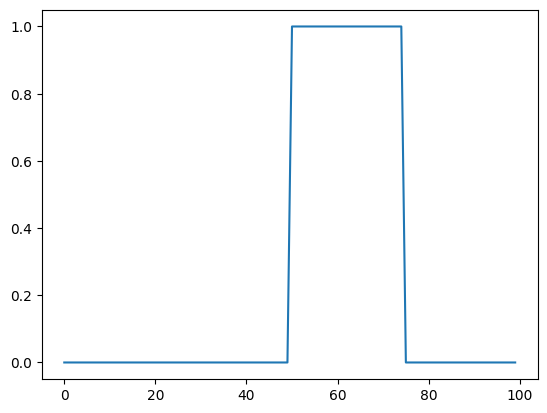

In [13]:
v = np.concatenate((np.zeros(50), np.ones(25), np.zeros(25)))

plt.plot(v)

Consider the following kernels $\mathbf{k}$:

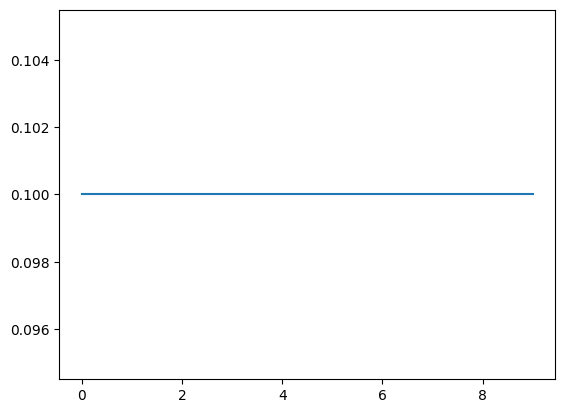

In [78]:
### first kernel
k = np.ones(10)/10

### second kernel
#k = signal.gaussian(20, std=3)
#k = k / np.sum(k)

### third kernel
#k = np.array([-1,2,-1])

plt.plot(k)

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 4 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

## 1. Toeplitz matrix

Define a Toeplitz matrix $K$ associated with the kernel $\mathbf{k}$.
Then, compute the convolution between $\mathbf{k}$ and $\mathbf{v}$, exploiting the property:

$\mathbf{k} * \mathbf{v} = K \mathbf{v}$

Execution time: 0.000000s
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4
 0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0. ]


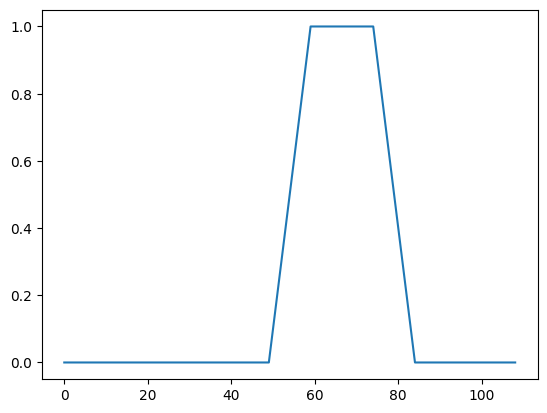

In [79]:
t0 = time.time()

k_paddded = np.zeros(len(v) + len(k) - 1)
k_paddded[:len(k)] = k

K = linalg.toeplitz(k_paddded, np.zeros(len(v)))
v_conv1 = K @ v

print(f'Execution time: {(time.time() - t0):1f}s')
print(v_conv1)
plt.plot(v_conv1)

## 2. Direct definition (sums of products)

The convolution without "boundary layer" (i.e. the part of the vector which is identical between the standard and the circular convolutions), is given by:

$(\mathbf{k} * \mathbf{v})_i = \sum_{j = 0}^{n_k - 1} \mathbf{k}_{n_k - j} \mathbf{v}_{i + j}$

for $i = 1, \dots, n_v - n_k + 1$.

Execution time: 0.001003s
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.9 0.8 0.7 0.6 0.5 0.4
 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0. ]


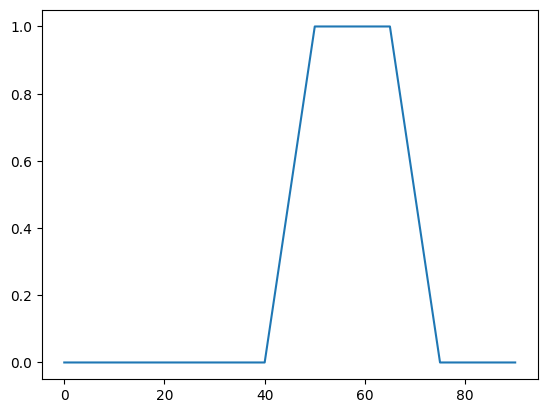

In [80]:
t0 = time.time()
l_out = v.shape[0] - k.shape[0] + 1
v_conv2 = np.empty(l_out)

for i in range(l_out):
    v_conv2[i] = np.sum(np.flip(k) * v[i:i+len(k)])
    #for j in range(k.shape[0]):
    #    v_conv2[i] += k[k.shape[0] - j - 1] * v[i + j]
    
print(f'Execution time: {(time.time() - t0):1f}s')
print(v_conv2)
plt.plot(v_conv2)

## 3. Convolution through DFT

When the two signals have the same size, we have:

$ \widehat{\mathbf{v} \circledast \mathbf{k}} = \widehat{\mathbf{v}} \odot \widehat{\mathbf{k}} $

Where:
- $\hat{\mathbf{a}}$ is the DFT of the signal $\mathbf{a}$
- $\circledast$ is the circular convolution
- $\odot$ is the Hadamard product

When the two signals do not have the same size, the above formula can be applied simply by "zero-padding" the shorter signal (N.B: this is automatically done by the `numpy.fft.fft` command by passing the required length as second argument).

Besides the filtered signal, plot the DFT of the two signals and of their convolution.


Execution time: 0.000000s
[-2.66453526e-17  3.55271368e-17  2.66453526e-17 -7.10542736e-17
 -5.32907052e-17  0.00000000e+00  7.10542736e-17  0.00000000e+00
  1.77635684e-17  8.88178420e-17 -1.77635684e-17  1.77635684e-17
  3.55271368e-17 -7.10542736e-17  1.06581410e-16  7.10542736e-17
  7.10542736e-17 -3.55271368e-17  0.00000000e+00  1.06581410e-16
  1.06581410e-16 -7.10542736e-17 -3.55271368e-17  0.00000000e+00
  5.32907052e-17 -3.55271368e-17  0.00000000e+00  1.42108547e-16
 -3.55271368e-17 -7.10542736e-17 -5.32907052e-17 -5.32907052e-17
 -1.77635684e-17 -1.24344979e-16 -7.10542736e-17 -3.55271368e-17
 -4.44089210e-17 -1.11022302e-16 -1.77635684e-16  1.77635684e-17
 -7.10542736e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.10542736e-17 -7.10542736e-17 -7.10542736e-17 -7.10542736e-17
 -7.10542736e-17  0.00000000e+00  1.00000000e-01  2.00000000e-01
  3.00000000e-01  4.00000000e-01  5.00000000e-01  6.00000000e-01
  7.00000000e-01  8.00000000e-01  9.00000000e-01  1.00000000e+00

Text(0.5, 1.0, 'v * k')

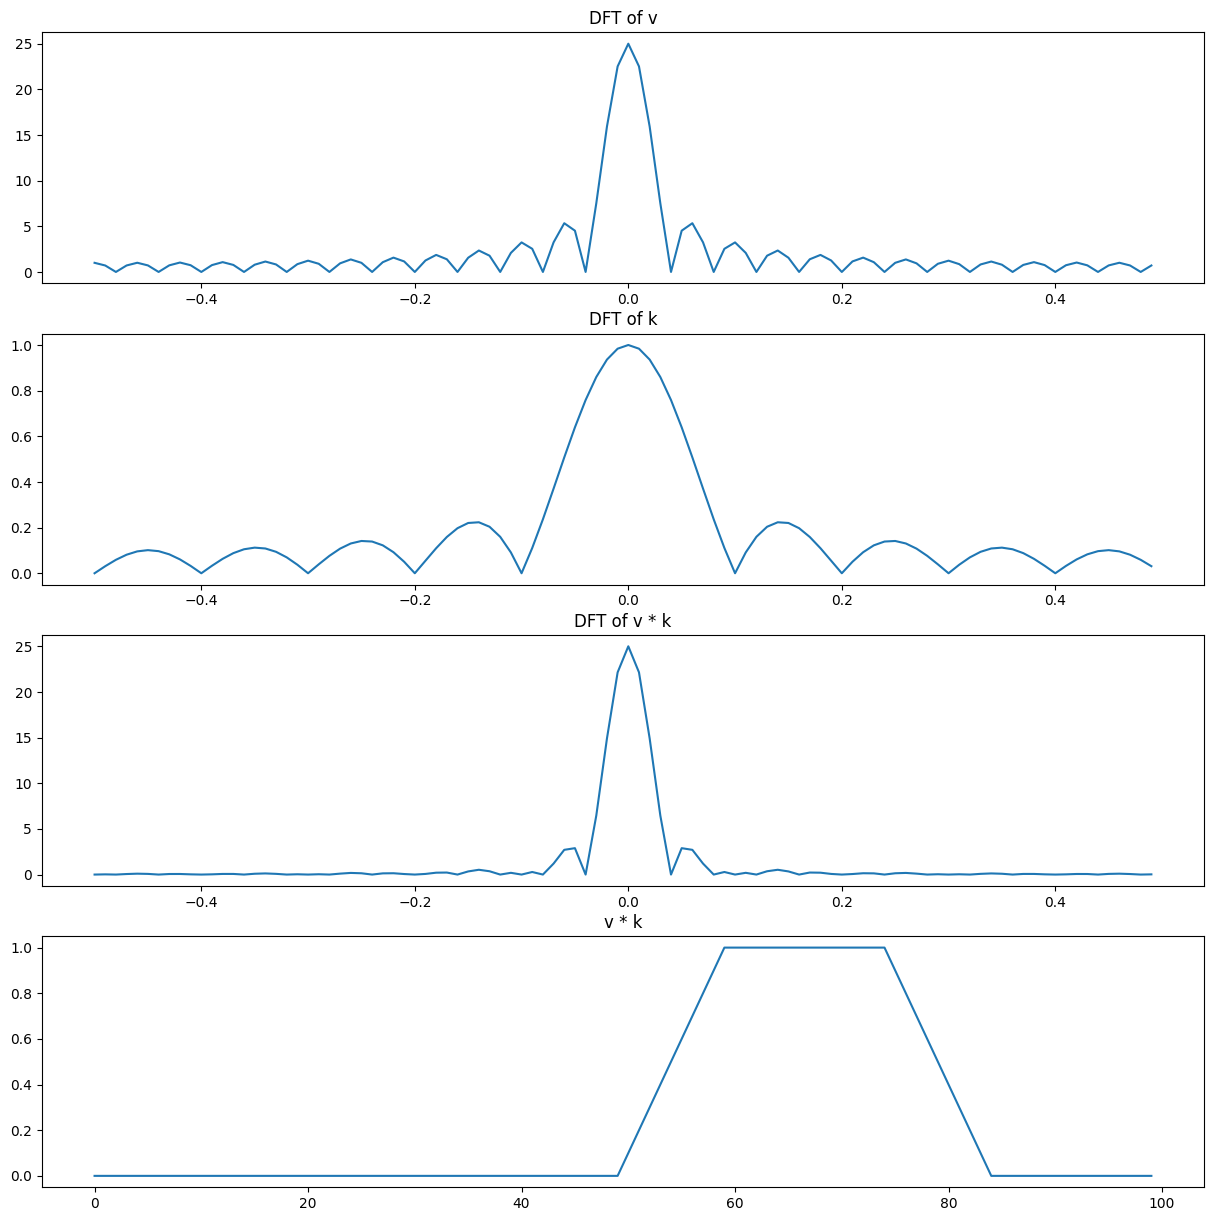

In [84]:
t0 = time.time()

dft_freq = np.fft.fftfreq(v.shape[0])
freq_shift = np.fft.fftshift(dft_freq)

dft_v = np.fft.fft(v)
dft_k = np.fft.fft(k, v.shape[0])
dft_conv = dft_v * dft_k

v_conv3 = np.real(np.fft.ifft(dft_conv))

print(f'Execution time: {(time.time() - t0):1f}s')
print(v_conv3)

fig, axs = plt.subplots(4, 1, figsize=(15, 15))
axs = axs.flatten()

axs[0].plot(freq_shift, np.fft.fftshift(np.absolute(dft_v)))
axs[0].set_title('DFT of v')
axs[1].plot(freq_shift, np.fft.fftshift(np.absolute(dft_k)))
axs[1].set_title('DFT of k')
axs[2].plot(freq_shift, np.fft.fftshift(np.absolute(dft_conv)))
axs[2].set_title('DFT of v * k')
axs[3].plot(v_conv3)
axs[3].set_title('v * k')


## 4. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

Execution time: 0.000000s
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4
 0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0. ]


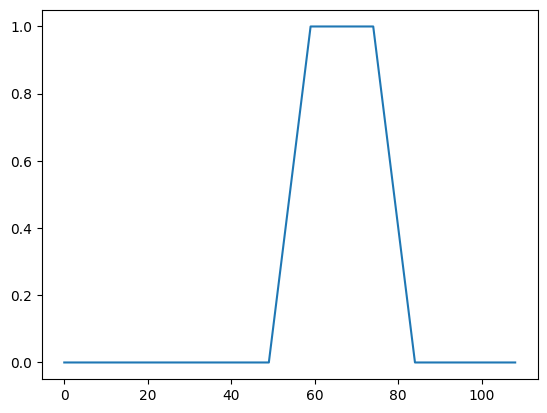

In [82]:
t0 = time.time()
v_conv4 = signal.convolve(v, k, mode='full')

print(f'Execution time: {(time.time() - t0):1f}s')
print(v_conv4)

plt.plot(v_conv4)